In [ ]:
Data Understanding
Load and inspect the dataset.
Use pandas for data manipulation and seaborn/matplotlib for visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load data
PSP_data = pd.read_excel("Copy of PSP_Jan_Feb_2019.xlsx")
PSP_data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [19]:
# number of rows and columns in the dataset
print("Dataset shape:", PSP_data.shape)

Dataset shape: (50410, 8)


In [22]:
# getting some info about the data
PSP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [23]:
# checking for missing values
PSP_data.isnull().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [24]:
# statistical measures about the data
PSP_data.describe()

,Unnamed: 0,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000,50410.000000
mean,25204.500000,202.395715,0.202896,0.238266
std,14552.257872,96.274730,0.402160,0.426027
min,0.000000,6.000000,0.000000,0.000000
25%,12602.250000,133.000000,0.000000,0.000000
50%,25204.500000,201.000000,0.000000,0.000000
75%,37806.750000,269.000000,0.000000,0.000000
max,50409.000000,630.000000,1.000000,1.000000


In [25]:
print(PSP_data.describe(include=['object']))

        country      PSP    card
count     50410    50410   50410
unique        3        4       3
top     Germany  UK_Card  Master
freq      30233    26459   29002


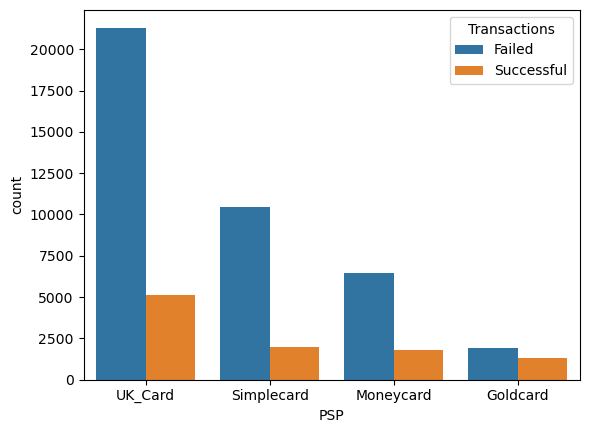

In [37]:
# Visualization example
sns.countplot(x='PSP', hue='success', data=df)
#plt.show()


plt.legend(title='Transactions' ,labels=['Failed', 'Successful'])  # Custom labels for 0 and 1
plt.show()

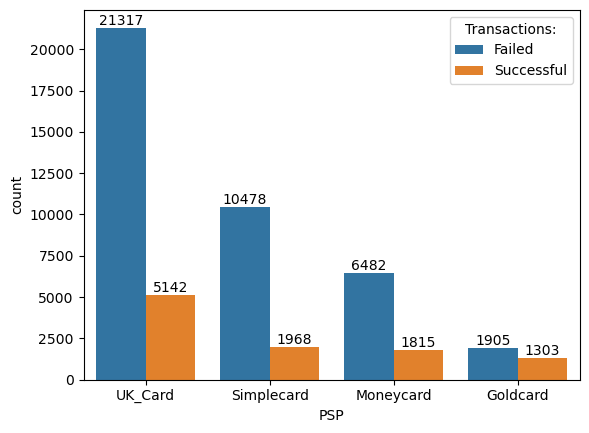

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already defined

# Create the count plot
ax = sns.countplot(x='PSP', hue='success', data=PSP_data)

# Add labels above the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),  # Use a formatted string to display the height
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center top of the bar
        ha='center', va='center',  # Center alignment for horizontal and vertical
        xytext=(0, 5),  # Slightly above the bar (offset)
        textcoords='offset points'
    )

# Customize the legend
plt.legend(title='Transactions:', labels=['Failed', 'Successful'])  # Custom labels for 0 and 1

# Show the plot
plt.show()

# Data Preparation
Clean and preprocess the data.

In [43]:
# Handle missing values
PSP_data.fillna(method='ffill', inplace=True)

# Feature engineering
PSP_data['is_repeat_attempt'] = df.duplicated(subset=['tmsp', 'country', 'amount'], keep=False)

# Encode categorical variables
PSP_data = pd.get_dummies(df, columns=['country', 'card', 'PSP'])

# Modeling
Implement and compare different models.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X = PSP_data.drop(columns=['success'])
y = PSP_data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)